In [1]:
import sys
sys.path.append('../../')
from helpers.window import window_input_output

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv('../../datasets/Conventional.csv')
df.head()

,Date,Envi,Fuji,Gala
0,2015-01-04,117454,429518,5554
1,2015-01-11,110974,427723,5358
2,2015-01-18,151977,500684,4225
3,2015-01-25,140914,422435,4945
4,2015-02-01,217716,608156,5736


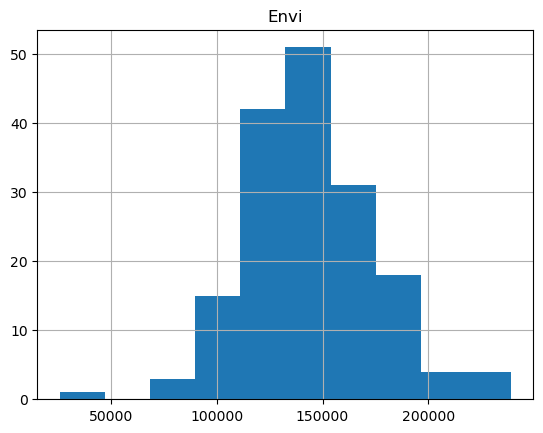

In [4]:
data = df[['Envi']]
data.hist();

In [5]:
seq_df = window_input_output(14, 14, data)
seq_df

,Envi,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,y_4,y_5,y_6,y_7,y_8,y_9,y_10,y_11,y_12,y_13
27,123673,146171.0,162886.0,184206.0,194447.0,167992.0,127748.0,198187.0,156010.0,148763.0,...,118578.0,101528.0,153410.0,116908.0,153584.0,217716.0,140914.0,151977.0,110974.0,117454.0
28,119266,123673.0,146171.0,162886.0,184206.0,194447.0,167992.0,127748.0,198187.0,156010.0,...,160422.0,118578.0,101528.0,153410.0,116908.0,153584.0,217716.0,140914.0,151977.0,110974.0
29,138943,119266.0,123673.0,146171.0,162886.0,184206.0,194447.0,167992.0,127748.0,198187.0,...,131882.0,160422.0,118578.0,101528.0,153410.0,116908.0,153584.0,217716.0,140914.0,151977.0
30,153499,138943.0,119266.0,123673.0,146171.0,162886.0,184206.0,194447.0,167992.0,127748.0,...,160679.0,131882.0,160422.0,118578.0,101528.0,153410.0,116908.0,153584.0,217716.0,140914.0
31,131770,153499.0,138943.0,119266.0,123673.0,146171.0,162886.0,184206.0,194447.0,167992.0,...,156967.0,160679.0,131882.0,160422.0,118578.0,101528.0,153410.0,116908.0,153584.0,217716.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,166753,159851.0,234996.0,234985.0,181752.0,147298.0,178992.0,184830.0,127053.0,142027.0,...,126274.0,126305.0,133463.0,114291.0,125320.0,150992.0,114530.0,122403.0,122874.0,113450.0
165,192776,166753.0,159851.0,234996.0,234985.0,181752.0,147298.0,178992.0,184830.0,127053.0,...,130556.0,126274.0,126305.0,133463.0,114291.0,125320.0,150992.0,114530.0,122403.0,122874.0
166,159389,192776.0,166753.0,159851.0,234996.0,234985.0,181752.0,147298.0,178992.0,184830.0,...,122061.0,130556.0,126274.0,126305.0,133463.0,114291.0,125320.0,150992.0,114530.0,122403.0
167,163394,159389.0,192776.0,166753.0,159851.0,234996.0,234985.0,181752.0,147298.0,178992.0,...,137872.0,122061.0,130556.0,126274.0,126305.0,133463.0,114291.0,125320.0,150992.0,114530.0


## Split data

In [6]:
X_cols = [col for col in seq_df.columns if col.startswith('x')]
X_cols.insert(0, 'Envi')
y_cols = [col for col in seq_df.columns if col.startswith('y')]

X = seq_df[X_cols]
y = seq_df[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=123)

In [7]:
model = Ridge()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Score

In [8]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Envi):", mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (Envi):", mae)

print("R-squared (Test score)", model.score(X_test, y_test))
print("Train score", model.score(X_train, y_train))

Mean Squared Error (Envi): 481500422.35214347
Mean Absolute Error (Envi): 16901.372808840802
R-squared (Test score) 0.11318713573039689
Train score 0.22729496931015422


## Visualization

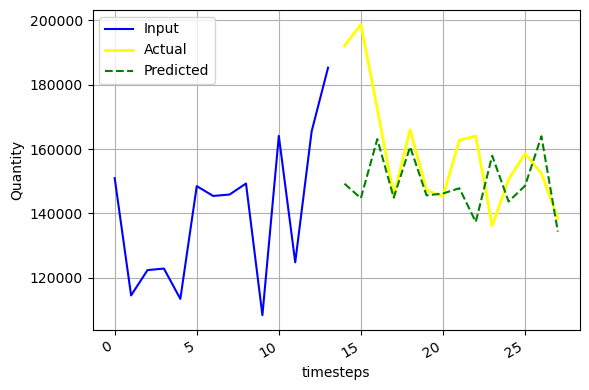

In [9]:
X_test_array = X_test.to_numpy()
y_test_array = y_test.to_numpy()

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(np.arange(0, 14, 1), X_test_array[1], 'b-', label='Input')
ax.plot(np.arange(14, 28, 1), y_test_array[1], color='yellow', label='Actual', linewidth=2)
ax.plot(np.arange(14, 28, 1), y_pred[1], color='green', label='Predicted', linestyle='--')

ax.set_xlabel('timesteps')
ax.set_ylabel('Quantity')
plt.grid(True)
plt.legend(loc=2)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

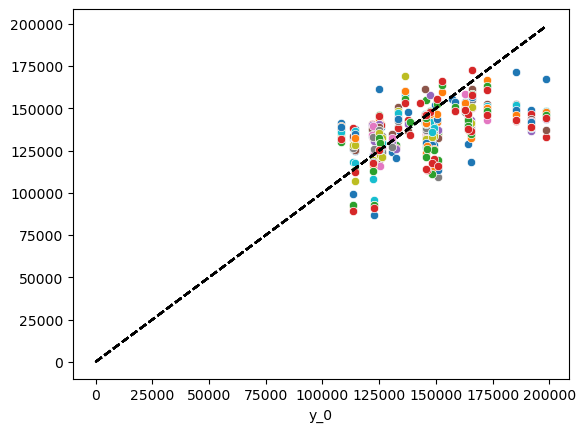

In [10]:
for i, col in enumerate(y_test.columns):
    sns.scatterplot(x=y_test[col], y=y_pred[:, i])

    max_val = max(y_test.max().max(), y_pred.max().max())
    plt.plot([0, max_val], [0, max_val], color='black', linestyle='--')